<a href="https://colab.research.google.com/github/Ushika02/British-Airways-Customer-Review/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sqlalchemy.sql.sqltypes import NULLTYPE
import requests
from bs4 import BeautifulSoup
import requests
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 25
page_size = 100

reviews = []
date_review = []  # To collect dates the review was posted
stars = []  # stars rating
seat = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    # date review
    for item in parsed_content.find_all("time"):
      date_review.append(item.text)
    
    # star
    for item in parsed_content.find_all(class_ = "rating-10"):
      try:
        stars.append(item.span.text)
      except:
        print(f"Error on page {i}")
        stars.append("None")
    
    # seat type
    tables = parsed_content.find_all('table')

    # Iterate over each table
    for table in tables:
      # Find the element with class 'review-rating-header' and text 'Seat Type'
      seat_type_element = table.find('td', class_='review-rating-header', string ='Seat Type')
      if seat_type_element:
        seat_type_value = seat_type_element.find_next_sibling('td', class_='review-value')
        if seat_type_value:
            seat_type = seat_type_value.get_text().strip()
            seat.append(seat_type)
  

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
# Checking length
len(reviews)
len(date_review)

2500

In [ ]:
stars = stars[:2500]

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df["date_review"] = date_review
df["rating"] = stars
df["seat"] = seat
df.head()


,reviews,date_review,rating,seat
0,✅ Trip Verified | A serious medical problem a...,1st June 2023,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,Economy Class
1,✅ Trip Verified | I haven't flown British Air...,30th May 2023,10,Economy Class
2,Not Verified | My itinerary was supposed to b...,29th May 2023,1,Economy Class
3,✅ Trip Verified | Busy day at LHR and flight ...,29th May 2023,1,Premium Economy
4,✅ Trip Verified | Worst seats I have ever enco...,27th May 2023,9,Economy Class


In [ ]:
df.to_csv("data.csv")

In [ ]:
# Data cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Adding a column to show if the trip is verified or not
df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0        True
1        True
2       False
3        True
4        True
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Name: verified, Length: 2500, dtype: bool

In [64]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmatizing the review section
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip("✅ Trip Verified |" or "Not Verified")

Review = []

for rev in reviews_data:
  rev = re.sub('[^a-zA-Z]',' ',rev)
  rev = rev.lower()
  rev = rev.split()
  rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
  rev = " ".join(rev)
  Review.append(rev)

df['Review'] = Review


In [ ]:
df.head()

,reviews,date_review,rating,seat,verified,Review
0,✅ Trip Verified | A serious medical problem a...,1st June 2023,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,Economy Class,True,serious medical problem appeared onboard infor...
1,✅ Trip Verified | I haven't flown British Air...,30th May 2023,10,Economy Class,True,flown british airway never fly check process t...
2,Not Verified | My itinerary was supposed to b...,29th May 2023,1,Economy Class,False,verified itinerary supposed la vega chicago lo...
3,✅ Trip Verified | Busy day at LHR and flight ...,29th May 2023,1,Premium Economy,True,busy day lhr flight full lounge crowded b gate...
4,✅ Trip Verified | Worst seats I have ever enco...,27th May 2023,9,Economy Class,True,worst seat ever encountered economy class leg ...


In [ ]:
# Format date
df.dtypes

reviews        object
date_review    object
rating         object
seat           object
verified         bool
Review         object
dtype: object

In [ ]:
# change date to datetime format
df.date_review = pd.to_datetime(df.date_review)
df.date_review.head()

0   2023-06-01
1   2023-05-30
2   2023-05-29
3   2023-05-29
4   2023-05-27
Name: date_review, dtype: datetime64[ns]

In [ ]:
# Cleaning stars rating
df.rating.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '10', '1', '9', '2', '4', '3',
       '5', '7', '8', '6'], dtype=object)

In [ ]:
# remove \n and \t from rating
df.rating = df.rating.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.rating.value_counts()

1     645
2     309
3     293
8     229
10    193
7     189
5     182
9     178
4     166
6     116
Name: rating, dtype: int64

In [ ]:
# Checking for null values
df.isnull().value_counts()

reviews  date_review  rating  seat   verified  Review
False    False        False   False  False     False     2500
dtype: int64

In [ ]:
df.head()

,reviews,date_review,rating,seat,verified,Review
0,✅ Trip Verified | A serious medical problem a...,2023-06-01,5,Economy Class,True,serious medical problem appeared onboard infor...
1,✅ Trip Verified | I haven't flown British Air...,2023-05-30,10,Economy Class,True,flown british airway never fly check process t...
2,Not Verified | My itinerary was supposed to b...,2023-05-29,1,Economy Class,False,verified itinerary supposed la vega chicago lo...
3,✅ Trip Verified | Busy day at LHR and flight ...,2023-05-29,1,Premium Economy,True,busy day lhr flight full lounge crowded b gate...
4,✅ Trip Verified | Worst seats I have ever enco...,2023-05-27,9,Economy Class,True,worst seat ever encountered economy class leg ...


In [ ]:
# export data 
df.to_csv("data2.csv")

In [4]:
# Data Analysis
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

df = pd.read_csv(r'data2.csv')
df


,Unnamed: 0,reviews,date_review,rating,seat,verified,Review
0,0,✅ Trip Verified | A serious medical problem a...,2023-06-01,5,Economy Class,True,serious medical problem appeared onboard infor...
1,1,✅ Trip Verified | I haven't flown British Air...,2023-05-30,10,Economy Class,True,flown british airway never fly check process t...
2,2,Not Verified | My itinerary was supposed to b...,2023-05-29,1,Economy Class,False,verified itinerary supposed la vega chicago lo...
3,3,✅ Trip Verified | Busy day at LHR and flight ...,2023-05-29,1,Premium Economy,True,busy day lhr flight full lounge crowded b gate...
4,4,✅ Trip Verified | Worst seats I have ever enco...,2023-05-27,9,Economy Class,True,worst seat ever encountered economy class leg ...
...,...,...,...,...,...,...,...
2020,2020,✅ Verified Review | I was flying Zurich to Ba...,2016-08-03,5,Economy Class,False,review flying zurich baltimore via london cell...
2021,2021,✅ Verified Review | Singapore to Sydney retur...,2016-08-03,4,Economy Class,False,review singapore sydney return british airway ...
2022,2022,✅ Verified Review | London Heathrow to Nassau...,2016-08-01,3,Business Class,False,review london heathrow nassau return british a...
2023,2023,✅ Verified Review | Miami to London Heathrow ...,2016-08-01,4,Business Class,False,review miami london heathrow british airway bu...


In [5]:
# drop the unnamed column
df = df.drop('Unnamed: 0', axis=1)
df

,reviews,date_review,rating,seat,verified,Review
0,✅ Trip Verified | A serious medical problem a...,2023-06-01,5,Economy Class,True,serious medical problem appeared onboard infor...
1,✅ Trip Verified | I haven't flown British Air...,2023-05-30,10,Economy Class,True,flown british airway never fly check process t...
2,Not Verified | My itinerary was supposed to b...,2023-05-29,1,Economy Class,False,verified itinerary supposed la vega chicago lo...
3,✅ Trip Verified | Busy day at LHR and flight ...,2023-05-29,1,Premium Economy,True,busy day lhr flight full lounge crowded b gate...
4,✅ Trip Verified | Worst seats I have ever enco...,2023-05-27,9,Economy Class,True,worst seat ever encountered economy class leg ...
...,...,...,...,...,...,...
2020,✅ Verified Review | I was flying Zurich to Ba...,2016-08-03,5,Economy Class,False,review flying zurich baltimore via london cell...
2021,✅ Verified Review | Singapore to Sydney retur...,2016-08-03,4,Economy Class,False,review singapore sydney return british airway ...
2022,✅ Verified Review | London Heathrow to Nassau...,2016-08-01,3,Business Class,False,review london heathrow nassau return british a...
2023,✅ Verified Review | Miami to London Heathrow ...,2016-08-01,4,Business Class,False,review miami london heathrow british airway bu...


In [6]:
# Average overall rating for BA
df.rating.mean()

4.231111111111111

Text(0.5, 0.98, 'Counts for each ratings')

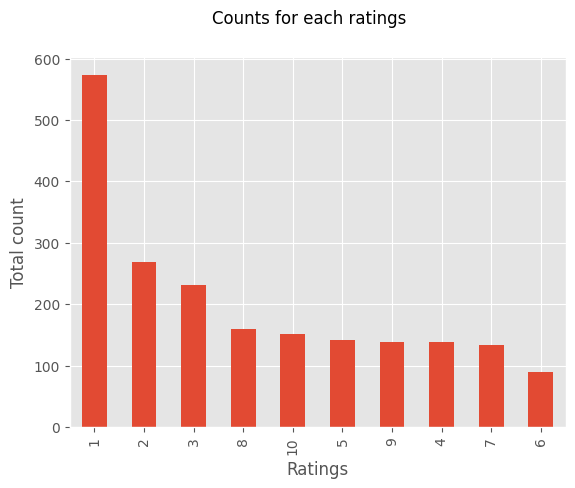

In [7]:
# Total count for each rating
df.rating.value_counts().plot(kind = 'bar')
plt.xlabel('Ratings')
plt.ylabel('Total count')
plt.suptitle('Counts for each ratings')

In [8]:
# Calculating percentage values of each rating
df_ratings = pd.DataFrame()
Total = df.rating.value_counts()
pct = (df.rating.value_counts()/2500)*100
df_ratings['Count'] = Total
df_ratings['Percentage'] = pct
df_ratings


,Count,Percentage
1,573,22.92
2,269,10.76
3,232,9.28
8,160,6.40
10,151,6.04
5,141,5.64
9,138,5.52
4,138,5.52
7,134,5.36
6,89,3.56


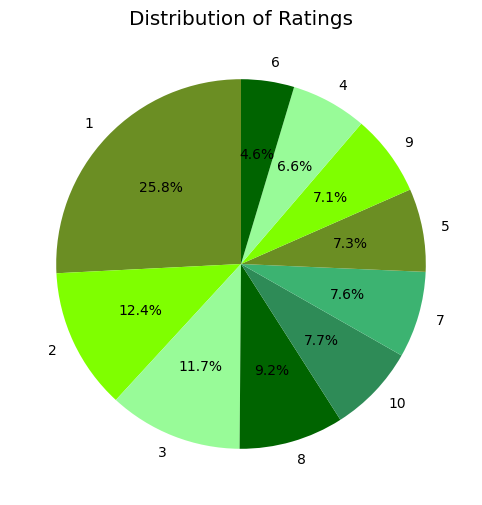

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with count and percentage of ratings
df_ratings = pd.DataFrame()
Total = df.rating.value_counts()
pct = (df.rating.value_counts() / len(df)) * 100
df_ratings['Count'] = Total
df_ratings['Percentage'] = pct

custom_colors = ['olivedrab', 'chartreuse', 'palegreen', 'darkgreen','seagreen','mediumseagreen']

# Create the pie chart
plt.figure(figsize=(8, 6))
labels = df_ratings.index
counts = df_ratings['Count']
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=custom_colors)

# Add a title
plt.title('Distribution of Ratings')

# Display the pie chart
plt.show()


Text(0.5, 1.0, 'Maximum number of ratings by seat type')

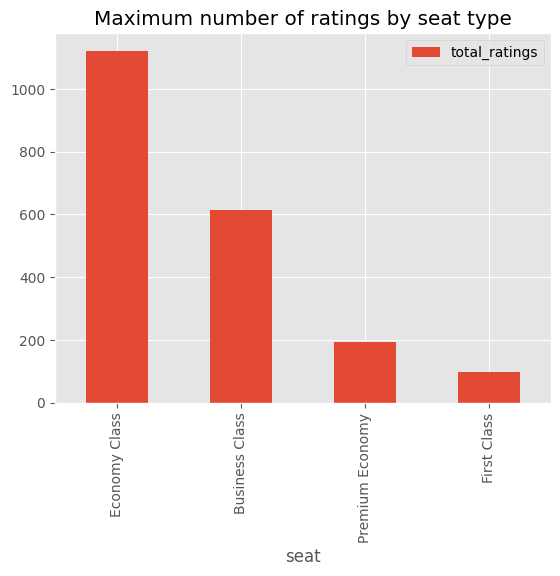

In [18]:
# Seat type vs ratings
df_seat_rating = pd.DataFrame(df.seat.value_counts().head()).reset_index()
df_seat_rating.rename(columns={'index':'seat','seat':'total_ratings'}, inplace=True)
df_seat_rating.plot(kind="bar", x='seat')
plt.title("Maximum number of ratings by seat type")

People from the Economy class provided the highest rating count/gave the most number of reviews.

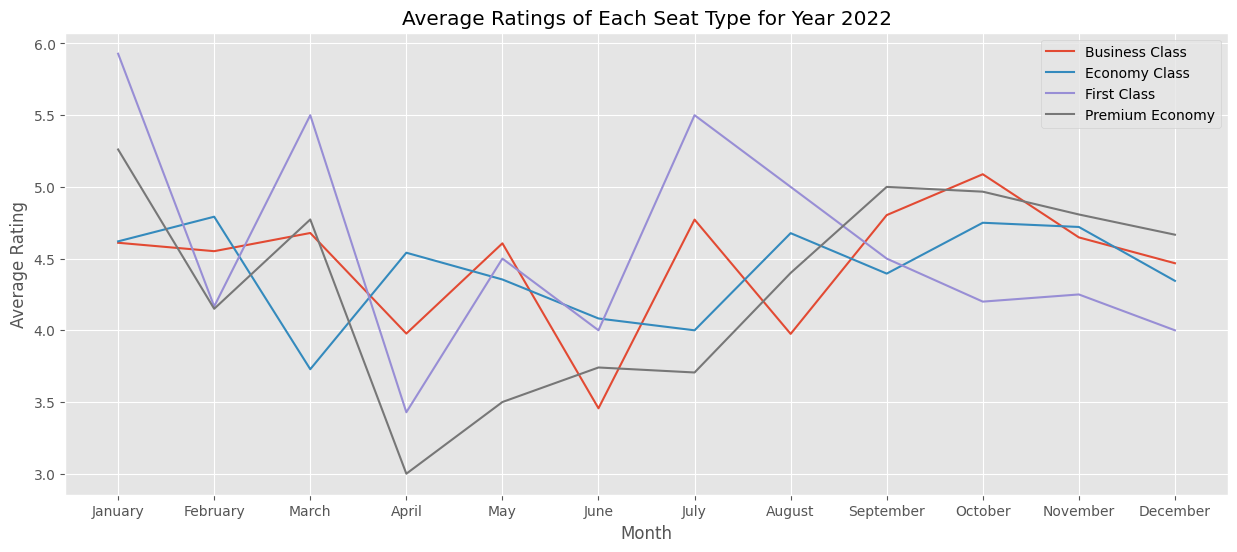

In [59]:
import calendar

df = pd.read_csv('data2.csv')
df['date_review'] = pd.to_datetime(df['date_review'])
# Extract the month and year from the 'Date' column
df['Month'] = df['date_review'].dt.month
df['Year'] = df['date_review'].dt.year

# Looking at only year 2022
df_2022 = df[df['Year'] == 2022]

# Calculate the average ratings for each seat and month
df_avg = df.groupby(['seat', 'Month'])['rating'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(15, 6))

# Iterate over unique seat types
for seat_type in df_avg['seat'].unique():
    # Filter the DataFrame for the current seat type
    seat_df = df_avg[df_avg['seat'] == seat_type]
    
    # Generate a label for the seat type (optional)
    label = seat_type
    month_names = seat_df['Month'].apply(lambda x: calendar.month_name[x])

    # Plot the average ratings for the current seat type
    plt.plot(month_names, seat_df['rating'], label=label)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Each Seat Type for Year 2022')
plt.legend()

# Display the plot
plt.show()

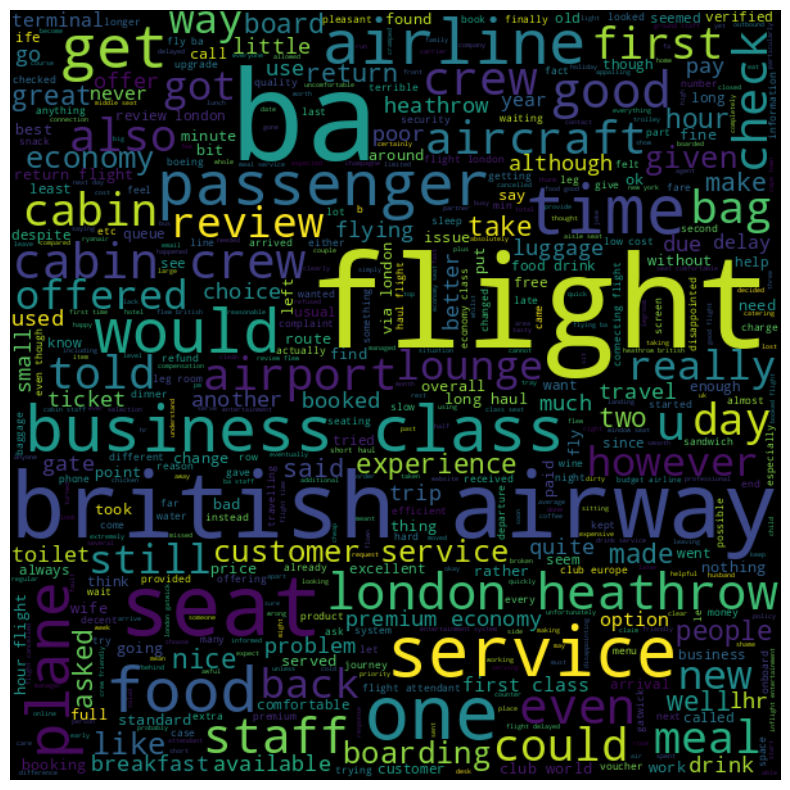

In [70]:
# Looking at reviews written
import nltk 
from nltk.corpus import stopwords

reviews = " ".join(df.Review)
plt.figure(figsize=(20,10))
stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

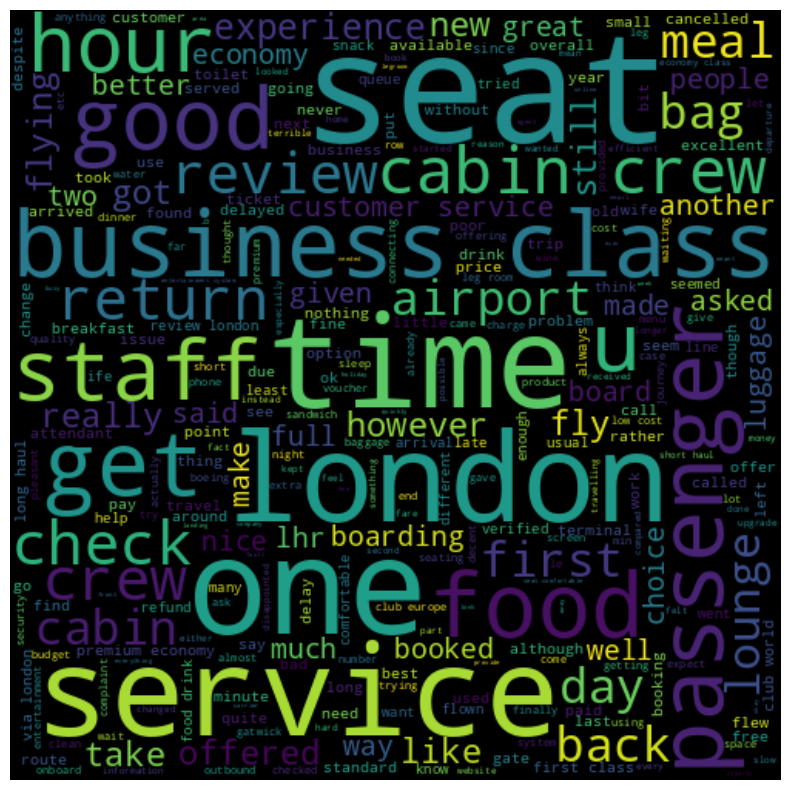

In [72]:
# including these words in the stopwords list because they are irrelevant
import nltk 
from nltk.corpus import stopwords

reviews = " ".join(df.Review)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

words like service, staff, seat etc could provide useful insight about the reviews

Text(0.5, 1.0, 'Frequent words mentioned in reviews')

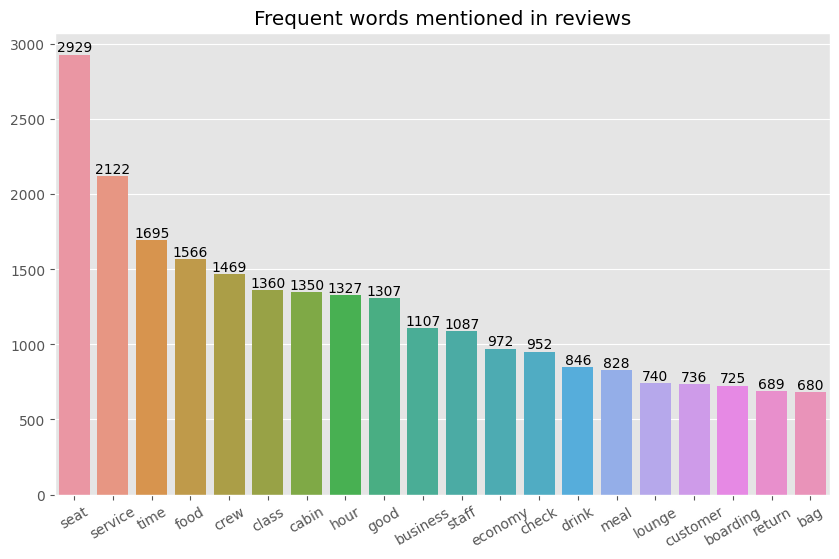

In [94]:
# Check the frequency of these words
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])

new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

fig, ax = plt.subplots(figsize=(10,6))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.title('Frequent words mentioned in reviews')

We can see what people mentioned mostly 'seat','service' etc. But we still don't know if reviews concerning these are positive or negative.

<Axes: >

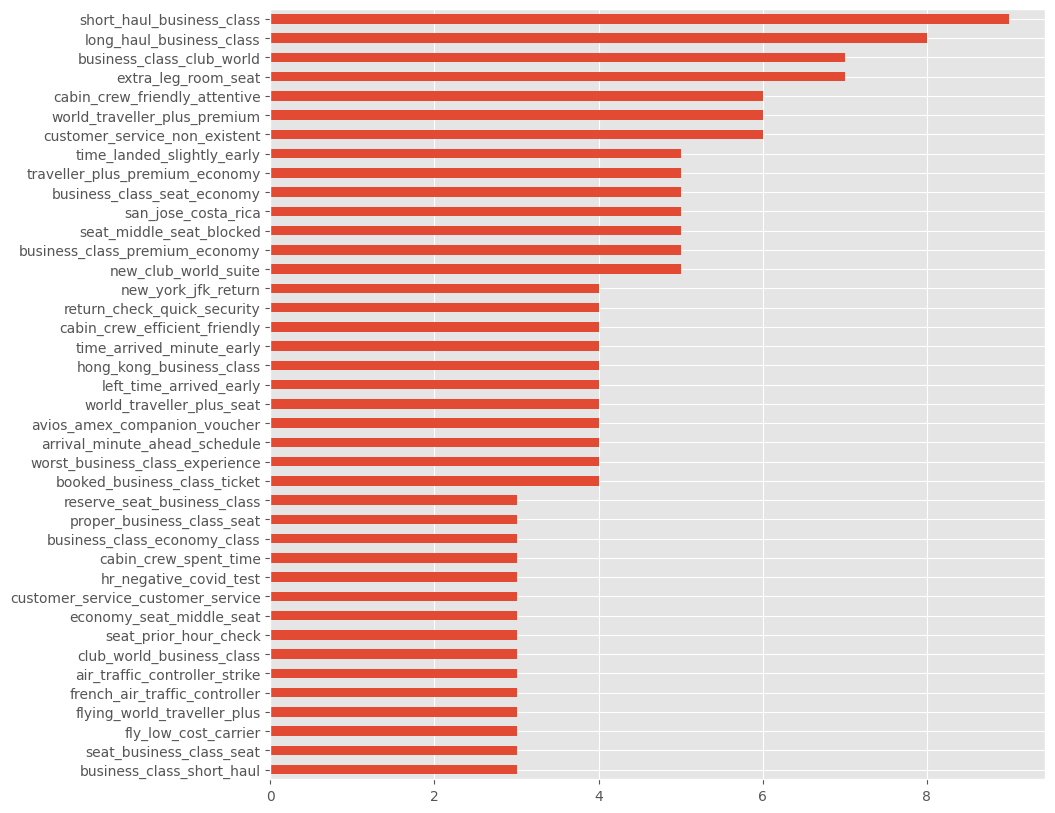

In [84]:
# let's try to find 4 consecutive words attached to the words above so that we might get a better idea of the reviews
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.Review)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]
def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

<Axes: >

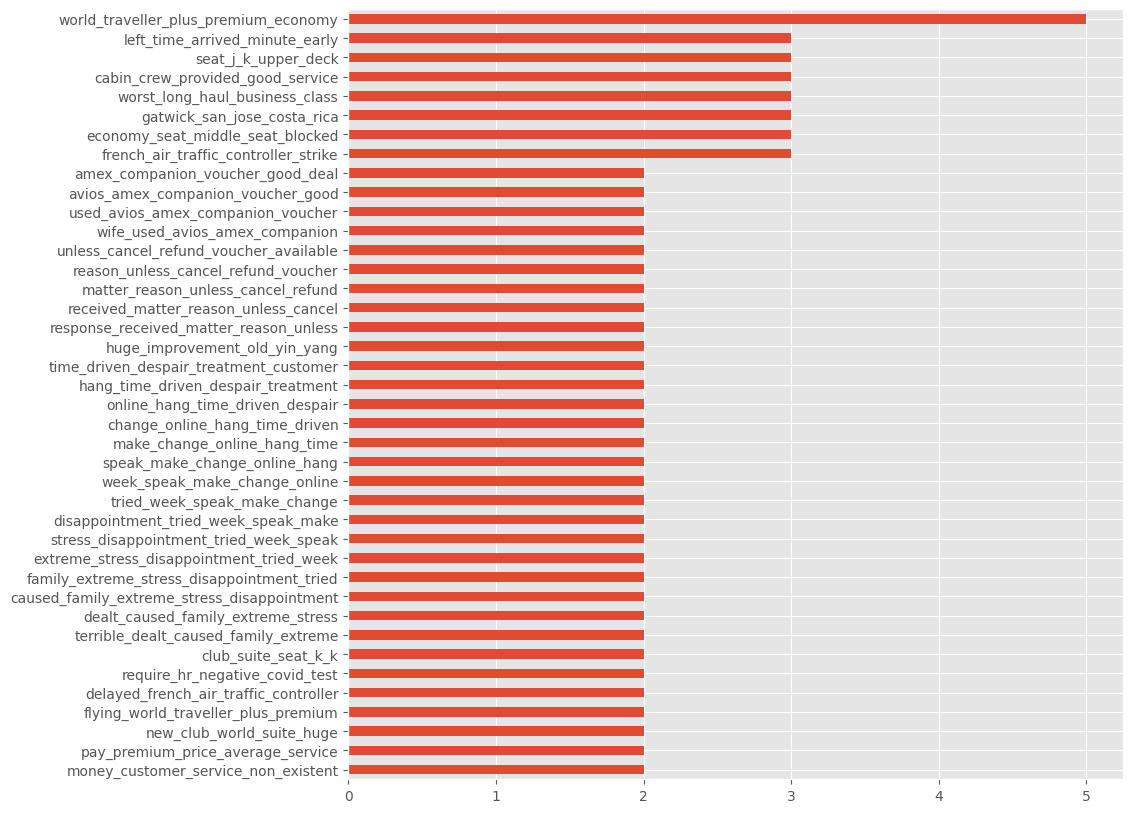

In [96]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.Review)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]
def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,5)